# Converting efficientnet-lite from Tensorflow to ONNX

Google recently [published a new flavor of efficientnet models](
https://blog.tensorflow.org/2020/03/higher-accuracy-on-vision-models-with-efficientnet-lite.html) that show great performance and accuracy on all mobile CPU/GPU/EdgeTPU devices. The models are found [here](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite). 
This tutorial shows how to convert them to ONNX.

To start, we setup a few environment variables and download the pre-trained model.

In [2]:
import os

HOME = os.getcwd()
MODEL = "efficientnet-lite4"
os.environ['PYTHONPATH'] = os.path.join(HOME, "tpu")
os.environ['MODEL'] = MODEL
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [ ]:
%cd {HOME}
!git clone https://github.com/tensorflow/tpu
%cd {HOME}/tpu/models/official/efficientnet

In [6]:
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/lite/$MODEL.tar.gz
!tar zxf $MODEL.tar.gz
!wget -q https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg
!wget -q https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt

Run a evaluation on tensorflow/cpu:

In [29]:
!python eval_ckpt_main.py --model_name=$MODEL --ckpt_dir=$MODEL --example_img=panda.jpg --labels_map_file=labels_map.txt --include_background_label

predicted class for image panda.jpg: 
  -> top_0 (85.58%): lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens  
  -> top_1 (0.26%): cheetah, chetah, Acinonyx jubatus  
  -> top_2 (0.24%): brown bear, bruin, Ursus arctos  
  -> top_3 (0.16%): African elephant, Loxodonta africana  
  -> top_4 (0.15%): American black bear, black bear, Ursus americanus, Euarctos americanus  


We can use the efficientnet ```export_model.py``` script to export the model as saved_model which makes exporting to ONNX very simple:

In [4]:
!python export_model.py --model_name=efficientnet-lite4 --ckpt_dir=efficientnet-lite4 --output_saved_model_dir=saved_model --output_tflite=/tmp/t

I0317 04:45:13.062742 140590807156480 efficientnet_lite_builder.py:100] global_params= GlobalParams(batch_norm_momentum=0.99, batch_norm_epsilon=0.001, dropout_rate=0.3, data_format='channels_last', num_classes=1000, width_coefficient=1.4, depth_coefficient=1.8, depth_divisor=8, min_depth=None, survival_prob=0.8, relu_fn=<function relu6 at 0x7fdd83fbcea0>, batch_norm=<class 'utils.BatchNormalization'>, use_se=False, local_pooling=True, condconv_num_experts=None, clip_projection_output=False, blocks_args=['r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25', 'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25', 'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25', 'r1_k3_s11_e6_i192_o320_se0.25'], fix_head_stem=True)
I0317 04:45:13.116612 140590807156480 efficientnet_model.py:153] round_filter input=32 output=48
I0317 04:45:13.116733 140590807156480 efficientnet_model.py:153] round_filter input=16 output=24
I0317 04:45:13.119245 140590807156480 efficientnet_mo

I0317 04:45:21.141554 140590807156480 api.py:567] Expand: efficientnet-lite4/model/blocks_16/Relu6:0 shape: (1, 14, 14, 960)
I0317 04:45:21.195437 140590807156480 api.py:567] DWConv: efficientnet-lite4/model/blocks_16/Relu6_1:0 shape: (1, 14, 14, 960)
I0317 04:45:21.252286 140590807156480 api.py:567] Project: efficientnet-lite4/model/blocks_16/Add:0 shape: (1, 14, 14, 160)
I0317 04:45:21.261178 140590807156480 api.py:567] block_17 survival_prob: 0.8866666666666667
I0317 04:45:21.269101 140590807156480 api.py:567] Block input: efficientnet-lite4/model/blocks_16/Add:0 shape: (1, 14, 14, 160)
I0317 04:45:21.276744 140590807156480 api.py:567] Block input depth: 160 output depth: 160
I0317 04:45:21.332792 140590807156480 api.py:567] Expand: efficientnet-lite4/model/blocks_17/Relu6:0 shape: (1, 14, 14, 960)
I0317 04:45:21.390112 140590807156480 api.py:567] DWConv: efficientnet-lite4/model/blocks_17/Relu6_1:0 shape: (1, 14, 14, 960)
I0317 04:45:21.447642 140590807156480 api.py:567] Project: e

I0317 04:45:23.872047 140590807156480 api.py:567] Expand: efficientnet-lite4/model/blocks_28/Relu6:0 shape: (1, 7, 7, 1632)
I0317 04:45:23.949152 140590807156480 api.py:567] DWConv: efficientnet-lite4/model/blocks_28/Relu6_1:0 shape: (1, 7, 7, 1632)
I0317 04:45:24.024661 140590807156480 api.py:567] Project: efficientnet-lite4/model/blocks_28/Add:0 shape: (1, 7, 7, 272)
I0317 04:45:24.033358 140590807156480 api.py:567] block_29 survival_prob: 0.8066666666666666
I0317 04:45:24.041232 140590807156480 api.py:567] Block input: efficientnet-lite4/model/blocks_28/Add:0 shape: (1, 7, 7, 272)
I0317 04:45:24.048917 140590807156480 api.py:567] Block input depth: 272 output depth: 448
I0317 04:45:24.127136 140590807156480 api.py:567] Expand: efficientnet-lite4/model/blocks_29/Relu6:0 shape: (1, 7, 7, 1632)
I0317 04:45:24.205864 140590807156480 api.py:567] DWConv: efficientnet-lite4/model/blocks_29/Relu6_1:0 shape: (1, 7, 7, 1632)
I0317 04:45:24.282718 140590807156480 api.py:567] Project: efficient

A look at the saved_model shows us the inputs and outputs of the model:

In [5]:
!saved_model_cli show --dir saved_model --tag_set serve  --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 224, 224, 3)
      name: images:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 1000)
      name: Softmax:0
Method name is: tensorflow/serving/predict


Install and run tf2onnx directly on the saved_model:

In [ ]:
!pip install git+https://github.com/onnx/tensorflow-onnx
!pip install onnxruntime

In [6]:
!python -m tf2onnx.convert --opset 11 --fold_const --saved-model saved_model --output $MODEL.onnx

2020-03-17 04:45:48,897 - INFO - Using tensorflow=2.1.0, onnx=1.6.0, tf2onnx=1.6.0/f48281
2020-03-17 04:45:48,897 - INFO - Using opset <onnx, 11>
2020-03-17 04:45:57,747 - INFO - Optimizing ONNX model
2020-03-17 04:46:08,488 - INFO - After optimization: Const -150 (609->459), Identity -33 (33->0), Reshape -30 (30->0), Transpose -395 (396->1)
2020-03-17 04:46:08,533 - INFO - 
2020-03-17 04:46:08,533 - INFO - Successfully converted TensorFlow model saved_model to ONNX
2020-03-17 04:46:08,927 - INFO - ONNX model is saved at efficientnet-lite4.onnx


Now that we have the ONNX model we can write a quick demo using onnxruntime:

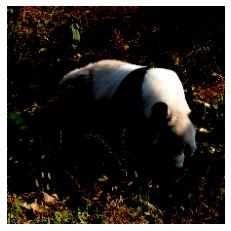

In [7]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import onnxruntime as rt
import cv2
import json

labels = json.load(open("labels_map.txt", "r"))


def img_stats(a, name={}):
    return {
        "name": name,
        "size": a.shape,
        "mean": "{:.2f}".format(a.mean()),
        "std": "{:.2f}".format(a.std()),
        "max": a.max(),
        "min": a.min(),
        "median": "{:.2f}".format(np.median(a)),
    }


def center_crop(img, out_height, out_width):
    height, width, _ = img.shape
    left = int((width - out_width) / 2)
    right = int((width + out_width) / 2)
    top = int((height - out_height) / 2)
    bottom = int((height + out_height) / 2)
    img = img[top:bottom, left:right]
    return img


def resize_with_aspectratio(img, out_height, out_width, scale=87.5, inter_pol=cv2.INTER_LINEAR):
    height, width, _ = img.shape
    new_height = int(100. * out_height / scale)
    new_width = int(100. * out_width / scale)
    if height > width:
        w = new_width
        h = int(new_height * height / width)
    else:
        h = new_height
        w = int(new_width * width / height)
    img = cv2.resize(img, (w, h), interpolation=inter_pol)
    return img


def pre_process_edgetpu(img, dims):
    output_height, output_width, _ = dims
    img = resize_with_aspectratio(img, output_height, output_width, inter_pol=cv2.INTER_LINEAR)
    img = center_crop(img, output_height, output_width)
    img = np.asarray(img, dtype='float32')
    img -= [127.0, 127.0, 127.0]
    img /= [128.0, 128.0, 128.0]
    return img


# read the image
fname = "panda.jpg"
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# pre-process the image like mobilenet and resize it to 300x300
img = pre_process_edgetpu(img, (224, 224, 3))
plt.axis('off')
plt.imshow(img)
plt.show()

# create a batch of 1 (that batch size is buned into the saved_model)
img_batch = np.expand_dims(img, axis=0)

In [8]:
# load the model
sess = rt.InferenceSession(MODEL + ".onnx")

In [9]:
# run inference and print results
results = sess.run(["Softmax:0"], {"images:0": img_batch})[0]
result = reversed(results[0].argsort()[-5:])
# result = np.argmax(results, axis=1)
for r in result:
    print(r, labels[str(r-1)], results[0][r])

388 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens 0.99857914
296 American black bear, black bear, Ursus americanus, Euarctos americanus 0.0004527254
294 cheetah, chetah, Acinonyx jubatus 0.00033851538
295 brown bear, bruin, Ursus arctos 0.00018831895
387 African elephant, Loxodonta africana 3.0347202e-05
